 # Capstone Project 2 - Data Story
## Name: Brock Nosbisch

#### Summary:
lkjsdf

In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)
from datetime import datetime

In [147]:

# Creation Functions Used.
def add_value_labels(ax, spacing=5):

    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        space = spacing
        va = 'bottom'

        if y_value < 0:
            space *= -1
            # Vertical alignment
            va = 'top'

        label = "{:}".format(y_value)  # Use :.1f if wanting decimals.

        # Create annotation
        ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va=va) 
        

In [148]:
file_name = 'data_wrangling_out.csv' # Service Agreement Level

df=pd.DataFrame()

# Read in the file with new column names.
df = pd.read_csv(file_name, header=0)

df.set_index('SA_ID', inplace=True)


In [149]:
#TEMP
df.loc[(df['PERSON_ID']==1000994193)]

,CIS_DIVISION,ACCOUNT_ID,CUSTOMER_CLASS_CODE,CUSTOMER_CLASS_DESCRIPTION,PERSON_ID,SA_START_DATE,SA_START_YEAR,SA_START_YEAR_MONTH,SA_END_DATE,SA_END_YEAR,...,PERSON_MIN_SA_END_DATE,PREMISE_MAX_SA_START_DATE,PREMISE_MIN_SA_START_DATE,PREMISE_MAX_SA_END_DATE,PREMISE_MIN_SA_END_DATE,PREMISE_PRIOR_STOP_DATE,PERSON_PRIOR_STOP_DATE,PREMISE_DAYS_INACTIVE_BEFORE,PERSON_DAYS_INACTIVE_BEFORE,USAGE_PAST_18_MONTHS
SA_ID,,,,,,,,,,,,,,,,,,,,,


In [150]:
df = df.astype({'ACCOUNT_ID':'str', 
                'PERSON_ID':'str', 
                'SA_STATUS_FLAG':'str', 
                'PREMISE_ID':'str',
                'POSTAL':'str',
                'SA_START_YEAR':'str',
                'SA_START_YEAR_MONTH':'str',
                'SA_END_YEAR':'str',
                'SA_END_YEAR_MONTH':'str',
                'SA_START_DATE':'datetime64[ns]',
                'SA_END_DATE':'datetime64[ns]',
                'MOST_RECENT_PAYMENT_DATE':'datetime64[ns]',
                'PERSON_MAX_SA_START_DATE':'datetime64[ns]',
                'PERSON_MIN_SA_START_DATE':'datetime64[ns]',   
                'PERSON_MAX_SA_END_DATE':'datetime64[ns]',
                'PERSON_MIN_SA_END_DATE':'datetime64[ns]',
                'PREMISE_MAX_SA_START_DATE':'datetime64[ns]',
                'PREMISE_MIN_SA_START_DATE':'datetime64[ns]',
                'PREMISE_MAX_SA_END_DATE':'datetime64[ns]',
                'PREMISE_MIN_SA_END_DATE':'datetime64[ns]',
                'PREMISE_PRIOR_STOP_DATE':'datetime64[ns]',
                'PERSON_PRIOR_STOP_DATE':'datetime64[ns]',
                'PLEDGE_DATE_2013':'datetime64[ns]',
                'PLEDGE_DATE_2014':'datetime64[ns]',
                'PLEDGE_DATE_2015':'datetime64[ns]',
                'PLEDGE_DATE_2016':'datetime64[ns]',
                'PLEDGE_DATE_2017':'datetime64[ns]',
                'PLEDGE_DATE_2018':'datetime64[ns]',
                'PLEDGE_DATE_2019':'datetime64[ns]'
               })

print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 661957 entries, 34935241500 to 68398773804
Data columns (total 91 columns):
CIS_DIVISION                     661957 non-null object
ACCOUNT_ID                       661957 non-null object
CUSTOMER_CLASS_CODE              661957 non-null object
CUSTOMER_CLASS_DESCRIPTION       661957 non-null object
PERSON_ID                        661957 non-null object
SA_START_DATE                    661957 non-null datetime64[ns]
SA_START_YEAR                    661957 non-null object
SA_START_YEAR_MONTH              661957 non-null object
SA_END_DATE                      661957 non-null datetime64[ns]
SA_END_YEAR                      661957 non-null object
SA_END_YEAR_MONTH                661957 non-null object
SA_STATUS_FLAG                   661957 non-null object
SA_TYPE_CODE                     661957 non-null object
RATE_CLASS_CODE                  661957 non-null object
RATE_CLASS_DESCRIPTION           661957 non-null object
PREMISE_ID        

#### Create columns to show if a person started with 20 days from a date.
Using these date ranges:
* 3/1/2018 - 3/20/2018
* 6/20/2018 - 7/9/2018
* 8/1/2018 - 8/20/2018
* 9/1/2018 - 9/20/2018
* 10/1/2018 - 10/20/2018
* 11/1/2018 - 11/20/2018
* 12/1/2018 - 12/20/2018

In [151]:
# 3/1/2018
df['START_20_DAYS_FROM_20180301'] = 0
df.loc[((df['SA_START_DATE'] >= datetime.strptime('3/1/2018', '%m/%d/%Y')) & (df['SA_START_DATE'] <= datetime.strptime('3/20/2018', '%m/%d/%Y'))), 'START_20_DAYS_FROM_20180301'] = 1

# 6/20/2018
df['START_20_DAYS_FROM_20180620'] = 0
df.loc[((df['SA_START_DATE'] >= datetime.strptime('6/20/2018', '%m/%d/%Y')) & (df['SA_START_DATE'] <= datetime.strptime('7/9/2018', '%m/%d/%Y'))), 'START_20_DAYS_FROM_20180620'] = 1

# 8/1/2018
df['START_20_DAYS_FROM_20180801'] = 0
df.loc[((df['SA_START_DATE'] >= datetime.strptime('8/1/2018', '%m/%d/%Y')) & (df['SA_START_DATE'] <= datetime.strptime('8/20/2018', '%m/%d/%Y'))), 'START_20_DAYS_FROM_20180801'] = 1

# 9/1/2018
df['START_20_DAYS_FROM_20180901'] = 0
df.loc[((df['SA_START_DATE'] >= datetime.strptime('9/1/2018', '%m/%d/%Y')) & (df['SA_START_DATE'] <= datetime.strptime('9/20/2018', '%m/%d/%Y'))), 'START_20_DAYS_FROM_20180901'] = 1

# 10/1/2018
df['START_20_DAYS_FROM_20181001'] = 0
df.loc[((df['SA_START_DATE'] >= datetime.strptime('10/1/2018', '%m/%d/%Y')) & (df['SA_START_DATE'] <= datetime.strptime('10/20/2018', '%m/%d/%Y'))), 'START_20_DAYS_FROM_20181001'] = 1

# 11/1/2018
df['START_20_DAYS_FROM_20181101'] = 0
df.loc[((df['SA_START_DATE'] >= datetime.strptime('11/1/2018', '%m/%d/%Y')) & (df['SA_START_DATE'] <= datetime.strptime('11/20/2018', '%m/%d/%Y'))), 'START_20_DAYS_FROM_20181101'] = 1

# 12/1/2018
df['START_20_DAYS_FROM_20181201'] = 0
df.loc[((df['SA_START_DATE'] >= datetime.strptime('12/1/2018', '%m/%d/%Y')) & (df['SA_START_DATE'] <= datetime.strptime('12/20/2018', '%m/%d/%Y'))), 'START_20_DAYS_FROM_20181201'] = 1


In [152]:
df.loc[((df['START_20_DAYS_FROM_20181001'] == 1)&(df['PERSON_DAYS_INACTIVE_BEFORE'] >=0))].describe()
#df.groupby('START_20_DAYS_FROM_20180301').count()

,INTERNAL_CREDIT_RATING,PAYMENTS_IN_LAST_18_MONTHS,BILLS_IN_LAST_18_MONTHS,PAY_SEGS_IN_LAST_18_MONTHS,BILL_SEGS_IN_LAST_18_MONTHS,ARREARS_CURRENT_AMOUNT,ARREARS_PAYOFF_AMOUNT,TOTAL_CURRENT_AMOUNT,TOTAL_PAYOFF_AMOUNT,LATE_PAYMENT_COUNT,...,PREMISE_DAYS_INACTIVE_BEFORE,PERSON_DAYS_INACTIVE_BEFORE,USAGE_PAST_18_MONTHS,START_20_DAYS_FROM_20180301,START_20_DAYS_FROM_20180620,START_20_DAYS_FROM_20180801,START_20_DAYS_FROM_20180901,START_20_DAYS_FROM_20181001,START_20_DAYS_FROM_20181101,START_20_DAYS_FROM_20181201
count,3508.000000,3508.000000,3508.000000,3508.000000,3508.000000,3508.000000,3508.000000,3508.000000,3508.000000,3508.000000,...,3508.000000,3508.000000,3508.000000,3508.0,3508.0,3508.0,3508.0,3508.0,3508.0,3508.0
mean,215.701254,6.524515,9.010547,6.524515,9.010547,76.695299,76.966371,76.890639,77.013153,0.679304,...,-1479.116021,122.635690,675.383609,0.0,0.0,0.0,0.0,1.0,0.0,0.0
std,472.352310,3.808313,3.051997,3.808313,3.051997,196.383581,199.855786,196.358293,199.840928,1.881446,...,6614.852492,267.400941,997.985471,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,-1888.000000,0.000000,0.000000,0.000000,0.000000,-1065.380000,-1065.380000,-1065.380000,-1065.380000,0.000000,...,-29676.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0
25%,-1.000000,3.000000,7.000000,3.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,356.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0
50%,-1.000000,7.000000,11.000000,7.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,6.000000,1.000000,588.600000,0.0,0.0,0.0,0.0,1.0,0.0,0.0
75%,700.000000,10.000000,11.000000,10.000000,11.000000,53.742500,51.787500,53.772500,52.065000,0.000000,...,128.000000,144.000000,828.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0
max,2000.000000,47.000000,21.000000,47.000000,21.000000,3094.660000,3094.660000,3094.660000,3094.660000,11.000000,...,1481.000000,1989.000000,37099.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [153]:
 #df[((df['SA_START_YEAR'] >= '2010')&(df['SA_START_YEAR'] <= '2020'))].groupby('SA_START_YEAR')['PERSON_DAYS_INACTIVE_BEFORE'].sum()
    
    
df[((df['SA_START_YEAR'] == '2017'))].groupby('PERSON_ID')['PERSON_DAYS_INACTIVE_BEFORE'].mean()
df.loc[(df['PERSON_ID']=='1000994193')]

df[((df['SA_START_YEAR'] >= '2010')&(df['SA_START_YEAR'] <= '2020')&(df['CIS_DIVISION']=='LGC'))].groupby('SA_START_YEAR')['PERSON_DAYS_INACTIVE_BEFORE'].mean()
        
        

SA_START_YEAR
2010     -55.135508
2011     -89.576977
2012     -60.286115
2013   -2145.423999
2014   -3310.013358
2015   -3384.594360
2016   -3706.138964
2017   -3952.564379
2018   -4064.670511
2019   -5160.553171
Name: PERSON_DAYS_INACTIVE_BEFORE, dtype: float64

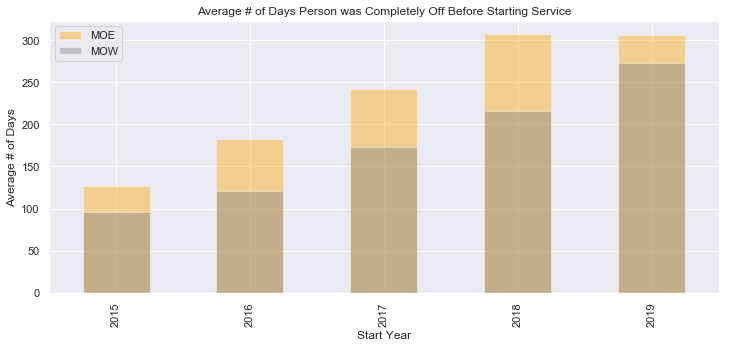

In [154]:

# Average # of Days Person was Off Before Starting Service
# Excluding Services that had another gas service at the same time which causes negative # of Days
# Only including a Person if they had service with us before.

plt.figure(figsize=(12,5))
plt1 = df[((df['SA_START_YEAR'] >= '2015')&(df['SA_START_YEAR'] <= '2020')&(df['CIS_DIVISION']=='LGC')&(df['PERSON_DAYS_INACTIVE_BEFORE']>=0)&(df['PERSON_PRIOR_STOP_DATE'].notnull()))].groupby('SA_START_YEAR')['PERSON_DAYS_INACTIVE_BEFORE'].mean().plot(kind='bar', color='orange', alpha=.4, grid=True, label='MOE')
plt1.set_title('Average # of Days Person was Completely Off Before Starting Service')

plt2 = df[((df['SA_START_YEAR'] >= '2015')&(df['SA_START_YEAR'] <= '2020')&(df['CIS_DIVISION']=='MGE')&(df['PERSON_DAYS_INACTIVE_BEFORE']>=0)&(df['PERSON_PRIOR_STOP_DATE'].notnull()))].groupby('SA_START_YEAR')['PERSON_DAYS_INACTIVE_BEFORE'].mean().plot(kind='bar', color='gray', alpha=.4, grid=True, label='MOW')

plt1.set_xlabel('Start Year')
plt1.set_ylabel('Average # of Days')

#plt1.set_xticks(np.arange(len(plt1_column_names)))

#plt1.set_xticklabels(plt1_column_names)

#h1, l1 = plt7.get_legend_handles_labels() 

plt.legend(loc=0)

plt.show()

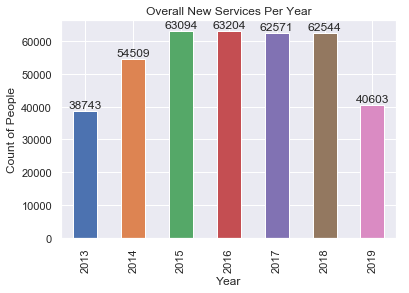

In [155]:
plt1 = df[(df['SA_START_YEAR'] >= '2013')].groupby('SA_START_YEAR')['ACCOUNT_ID'].count().plot(kind='bar')
plt1.set_title('Overall New Services Per Year')
plt1.set_xlabel('Year')
plt1.set_ylabel('Count of People')
add_value_labels(plt1,1)

plt.show()

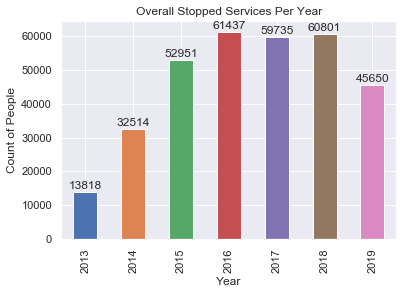

In [156]:
plt1 = df[((df['SA_END_YEAR'] >= '2013') & (df['SA_END_YEAR'] <= '2019'))].groupby('SA_END_YEAR')['ACCOUNT_ID'].count().plot(kind='bar')
plt1.set_title('Overall Stopped Services Per Year')
plt1.set_xlabel('Year')
plt1.set_ylabel('Count of People')
add_value_labels(plt1,1)

plt.show()

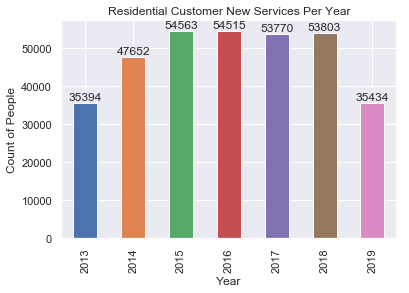

In [157]:
plt1 = df[((df['SA_START_YEAR'] >= '2013')&(df['CUSTOMER_CLASS_CODE'] == 'RES'))].groupby('SA_START_YEAR')['ACCOUNT_ID'].count().plot(kind='bar')
plt1.set_title('Residential Customer New Services Per Year')
plt1.set_xlabel('Year')
plt1.set_ylabel('Count of People')
add_value_labels(plt1,1)

plt.show()

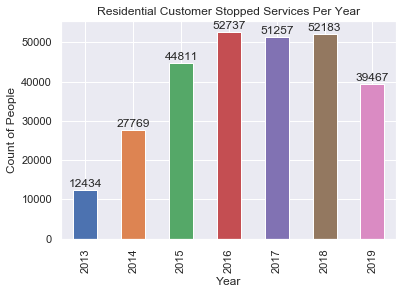

In [158]:
plt1 = df[((df['SA_END_YEAR'] >= '2013') & (df['SA_END_YEAR'] <= '2019')
           &(df['CUSTOMER_CLASS_CODE'] == 'RES'))].groupby('SA_END_YEAR')['ACCOUNT_ID'].count().plot(kind='bar')
plt1.set_title('Residential Customer Stopped Services Per Year')
plt1.set_xlabel('Year')
plt1.set_ylabel('Count of People')
add_value_labels(plt1,1)

plt.show()

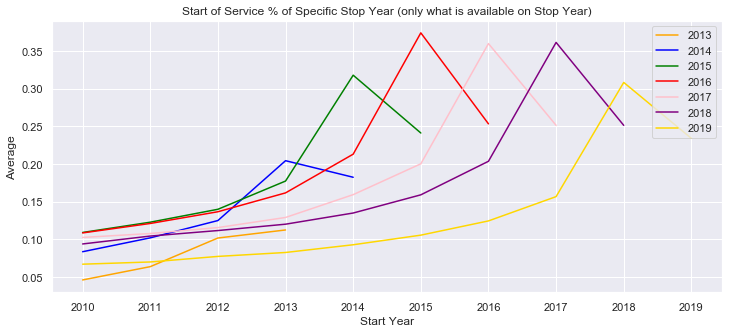

In [159]:
plt1_column_names = ('2010','2011','2012','2013','2014','2015','2016','2017','2018','2019')

plt.figure(figsize=(12,5))
plt1 = df[((df['SA_START_YEAR'] <= '2013')&(df['SA_END_YEAR'] >= '2013')
   &(df['SA_START_YEAR'] >= '2010')&(df['SA_START_YEAR'] <= '2020'))].groupby('SA_START_YEAR')['STOP_2013'].mean().plot(kind='line', color='orange', grid=True, label='2013')
plt1.set_title('Start of Service % of Specific Stop Year (only what is available on Stop Year)')

plt2 = df[((df['SA_START_YEAR'] <= '2014')&(df['SA_END_YEAR'] >= '2014')
   &(df['SA_START_YEAR'] >= '2010')&(df['SA_START_YEAR'] <= '2020'))].groupby('SA_START_YEAR')['STOP_2014'].mean().plot(kind='line', color='blue', grid=True, label='2014')
plt3 = df[((df['SA_START_YEAR'] <= '2015')&(df['SA_END_YEAR'] >= '2015')
   &(df['SA_START_YEAR'] >= '2010')&(df['SA_START_YEAR'] <= '2020'))].groupby('SA_START_YEAR')['STOP_2015'].mean().plot(kind='line', color='green', grid=True, label='2015')
plt4 = df[((df['SA_START_YEAR'] <= '2016')&(df['SA_END_YEAR'] >= '2016')
   &(df['SA_START_YEAR'] >= '2010')&(df['SA_START_YEAR'] <= '2020'))].groupby('SA_START_YEAR')['STOP_2016'].mean().plot(kind='line', color='red', grid=True, label='2016')
plt5 = df[((df['SA_START_YEAR'] <= '2017')&(df['SA_END_YEAR'] >= '2017')
   &(df['SA_START_YEAR'] >= '2010')&(df['SA_START_YEAR'] <= '2020'))].groupby('SA_START_YEAR')['STOP_2017'].mean().plot(kind='line', color='pink', grid=True, label='2017')
plt6 = df[((df['SA_START_YEAR'] <= '2018')&(df['SA_END_YEAR'] >= '2018')
   &(df['SA_START_YEAR'] >= '2010')&(df['SA_START_YEAR'] <= '2020'))].groupby('SA_START_YEAR')['STOP_2018'].mean().plot(kind='line', color='purple', grid=True, label='2018')
plt7 = df[((df['SA_START_YEAR'] <= '2019')&(df['SA_END_YEAR'] >= '2019')
   &(df['SA_START_YEAR'] >= '2010')&(df['SA_START_YEAR'] <= '2020'))].groupby('SA_START_YEAR')['STOP_2019'].mean().plot(kind='line', color='gold', grid=True, label='2019')

plt1.set_xlabel('Start Year')
plt1.set_ylabel('Average')

plt1.set_xticks(np.arange(len(plt1_column_names)))

plt1.set_xticklabels(plt1_column_names)

h1, l1 = plt7.get_legend_handles_labels() 

plt.legend(h1, l1, loc=1)

plt.show()

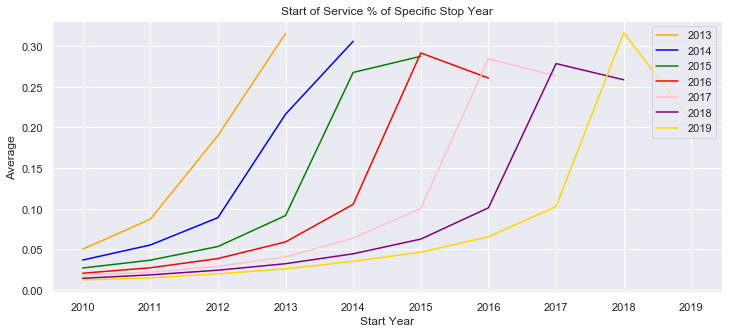

In [160]:
--20190910
plt1_column_names = ('2010','2011','2012','2013','2014','2015','2016','2017','2018','2019')

plt.figure(figsize=(12,5))
plt1 = df[((df['SA_START_YEAR'] <= '2013')&(df['SA_END_YEAR'] >= '2013')
   &(df['SA_START_YEAR'] >= '2010')&(df['SA_START_YEAR'] <= '2020'))].groupby('SA_START_YEAR')['STOP_2013'].sum().divide(df['STOP_2013'][((df['STOP_2013'] == 1))].sum()).plot(kind='line', color='orange', grid=True, label='2013')
plt1.set_title('Start of Service % of Specific Stop Year')

plt2 = df[((df['SA_START_YEAR'] <= '2014')&(df['SA_END_YEAR'] >= '2014')
   &(df['SA_START_YEAR'] >= '2010')&(df['SA_START_YEAR'] <= '2020'))].groupby('SA_START_YEAR')['STOP_2014'].sum().divide(df['STOP_2014'][((df['STOP_2014'] == 1))].sum()).plot(kind='line', color='blue', grid=True, label='2014')
plt3 = df[((df['SA_START_YEAR'] <= '2015')&(df['SA_END_YEAR'] >= '2015')
   &(df['SA_START_YEAR'] >= '2010')&(df['SA_START_YEAR'] <= '2020'))].groupby('SA_START_YEAR')['STOP_2015'].sum().divide(df['STOP_2015'][((df['STOP_2015'] == 1))].sum()).plot(kind='line', color='green', grid=True, label='2015')
plt4 = df[((df['SA_START_YEAR'] <= '2016')&(df['SA_END_YEAR'] >= '2016')
   &(df['SA_START_YEAR'] >= '2010')&(df['SA_START_YEAR'] <= '2020'))].groupby('SA_START_YEAR')['STOP_2016'].sum().divide(df['STOP_2016'][((df['STOP_2016'] == 1))].sum()).plot(kind='line', color='red', grid=True, label='2016')
plt5 = df[((df['SA_START_YEAR'] <= '2017')&(df['SA_END_YEAR'] >= '2017')
   &(df['SA_START_YEAR'] >= '2010')&(df['SA_START_YEAR'] <= '2020'))].groupby('SA_START_YEAR')['STOP_2017'].sum().divide(df['STOP_2017'][((df['STOP_2017'] == 1))].sum()).plot(kind='line', color='pink', grid=True, label='2017')
plt6 = df[((df['SA_START_YEAR'] <= '2018')&(df['SA_END_YEAR'] >= '2018')
   &(df['SA_START_YEAR'] >= '2010')&(df['SA_START_YEAR'] <= '2020'))].groupby('SA_START_YEAR')['STOP_2018'].sum().divide(df['STOP_2018'][((df['STOP_2018'] == 1))].sum()).plot(kind='line', color='purple', grid=True, label='2018')
plt7 = df[((df['SA_START_YEAR'] <= '2019')&(df['SA_END_YEAR'] >= '2019')
   &(df['SA_START_YEAR'] >= '2010')&(df['SA_START_YEAR'] <= '2020'))].groupby('SA_START_YEAR')['STOP_2019'].sum().divide(df['STOP_2019'][((df['STOP_2019'] == 1))].sum()).plot(kind='line', color='gold', grid=True, label='2019')

plt1.set_xlabel('Start Year')
plt1.set_ylabel('Average')

plt1.set_xticks(np.arange(len(plt1_column_names)))

plt1.set_xticklabels(plt1_column_names)

h1, l1 = plt7.get_legend_handles_labels() 

plt.legend(h1, l1, loc=1)

plt.show()

In [161]:
df[((df['SA_START_YEAR'] <= '2013')&(df['SA_END_YEAR'] >= '2013')
   &(df['SA_START_YEAR'] >= '2010')&(df['SA_START_YEAR'] <= '2020'))].groupby('SA_START_YEAR')['STOP_2013'].mean()
#df[((df['SA_START_YEAR'] <= '2013')&(df['SA_END_YEAR'] >= '2013'))].head(10)

SA_START_YEAR
2010    0.046161
2011    0.063825
2012    0.101822
2013    0.112511
Name: STOP_2013, dtype: float64

In [162]:
df[((df['SA_START_YEAR'] <= '2018')&(df['SA_END_YEAR'] >= '2018')
   &(df['SA_START_YEAR'] >= '2010')&(df['SA_START_YEAR'] <= '2020'))].groupby('SA_START_YEAR')['STOP_2018'].count()
#df[((df['SA_START_YEAR'] <= '2013')&(df['SA_END_YEAR'] >= '2013'))].head(10)

SA_START_YEAR
2010     9378
2011    10907
2012    13307
2013    16425
2014    20102
2015    23957
2016    30202
2017    46838
2018    62544
Name: STOP_2018, dtype: int64

In [163]:
df[((df['SA_START_YEAR'] <= '2018')&(df['SA_END_YEAR'] >= '2018')
   &(df['SA_START_YEAR'] >= '2010')&(df['SA_START_YEAR'] <= '2020'))].groupby('SA_START_YEAR')['STOP_2018'].sum()
#df[((df['SA_START_YEAR'] <= '2013')&(df['SA_END_YEAR'] >= '2013'))].head(10)

SA_START_YEAR
2010      881
2011     1139
2012     1487
2013     1974
2014     2714
2015     3813
2016     6152
2017    16932
2018    15723
Name: STOP_2018, dtype: int64

In [164]:
df[((df['SA_START_YEAR'] == '2017'))].groupby(('SA_END_YEAR')).count()

,CIS_DIVISION,ACCOUNT_ID,CUSTOMER_CLASS_CODE,CUSTOMER_CLASS_DESCRIPTION,PERSON_ID,SA_START_DATE,SA_START_YEAR,SA_START_YEAR_MONTH,SA_END_DATE,SA_END_YEAR_MONTH,...,PREMISE_DAYS_INACTIVE_BEFORE,PERSON_DAYS_INACTIVE_BEFORE,USAGE_PAST_18_MONTHS,START_20_DAYS_FROM_20180301,START_20_DAYS_FROM_20180620,START_20_DAYS_FROM_20180801,START_20_DAYS_FROM_20180901,START_20_DAYS_FROM_20181001,START_20_DAYS_FROM_20181101,START_20_DAYS_FROM_20181201
SA_END_YEAR,,,,,,,,,,,,,,,,,,,,,
2017,15733,15733,15733,15733,15733,15733,15733,15733,15733,15733,...,15733,15733,15733,15733,15733,15733,15733,15733,15733,15733
2018,16932,16932,16932,16932,16932,16932,16932,16932,16932,16932,...,16932,16932,16932,16932,16932,16932,16932,16932,16932,16932
2019,4689,4689,4689,4689,4689,4689,4689,4689,4689,4689,...,4689,4689,4689,4689,4689,4689,4689,4689,4689,4689
2099,25217,25217,25217,25217,25217,25217,25217,25217,25217,25217,...,25217,25217,25217,25217,25217,25217,25217,25217,25217,25217


In [165]:
df[((df['SA_START_YEAR'] == '2017'))].count()

CIS_DIVISION                     62571
ACCOUNT_ID                       62571
CUSTOMER_CLASS_CODE              62571
CUSTOMER_CLASS_DESCRIPTION       62571
PERSON_ID                        62571
SA_START_DATE                    62571
SA_START_YEAR                    62571
SA_START_YEAR_MONTH              62571
SA_END_DATE                      62571
SA_END_YEAR                      62571
SA_END_YEAR_MONTH                62571
SA_STATUS_FLAG                   62571
SA_TYPE_CODE                     62571
RATE_CLASS_CODE                  62571
RATE_CLASS_DESCRIPTION           62571
PREMISE_ID                       62571
CITY                             62571
STATE                            62571
POSTAL                           62571
BILL_CYCLE_CODE                  62571
BILL_CYCLE_DESCRIPTION           62571
SERVICE_TYPE_CODE                62571
PREMISE_TYPE_CODE                62571
TREND_AREA_CODE                  62571
OFFICE_LOCATION                  62571
OFFICE_LOCATION_DESCRIPTI

In [166]:
df[((df['SA_START_YEAR'] <= '2013')&(df['SA_END_YEAR'] >= '2013')
   &(df['SA_START_YEAR'] >= '2010')&(df['SA_START_YEAR'] <= '2020'))].groupby('SA_START_YEAR')['STOP_2013'].sum()

SA_START_YEAR
2010     695
2011    1204
2012    2626
2013    4359
Name: STOP_2013, dtype: int64

In [167]:
df['STOP_2013'][((df['STOP_2013'] == 1))].sum()

13818

In [168]:
df[((df['SA_START_YEAR'] <= '2013')&(df['SA_END_YEAR'] >= '2013')
   &(df['SA_START_YEAR'] >= '2010')&(df['SA_START_YEAR'] <= '2020'))].groupby('SA_START_YEAR')['STOP_2013'].sum().divide(df['STOP_2013'][((df['STOP_2013'] == 1))].sum())

SA_START_YEAR
2010    0.050297
2011    0.087133
2012    0.190042
2013    0.315458
Name: STOP_2013, dtype: float64

In [169]:
df.groupby(['SA_END_YEAR'])['SA_START_YEAR'].describe()

,count,unique,top,freq
SA_END_YEAR,,,,
1993,1,1,1993,1
1994,2,2,1991,1
1995,3,2,1993,2
1996,3,3,1990,1
1997,3,3,1992,1
1998,28,10,1998,8
1999,1,1,1987,1
2001,2,2,1991,1
2002,1,1,2001,1


## ANNEX

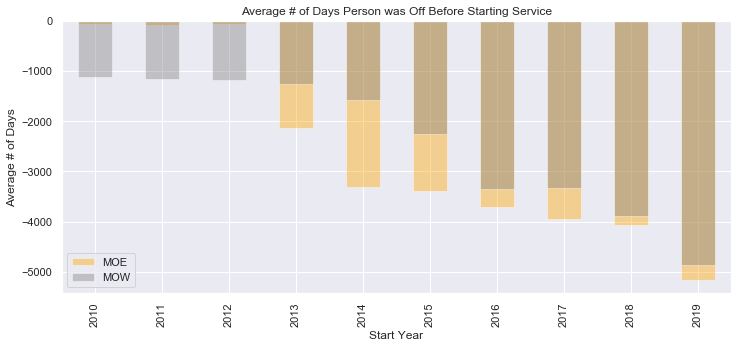

In [170]:

# Average # of Days Person was Off Before Starting Service

plt.figure(figsize=(12,5))
plt1 = df[((df['SA_START_YEAR'] >= '2010')&(df['SA_START_YEAR'] <= '2020')&(df['CIS_DIVISION']=='LGC'))].groupby('SA_START_YEAR')['PERSON_DAYS_INACTIVE_BEFORE'].mean().plot(kind='bar', color='orange', alpha=.4, grid=True, label='MOE')
plt1.set_title('Average # of Days Person was Off Before Starting Service')

plt2 = df[((df['SA_START_YEAR'] >= '2010')&(df['SA_START_YEAR'] <= '2020')&(df['CIS_DIVISION']=='MGE'))].groupby('SA_START_YEAR')['PERSON_DAYS_INACTIVE_BEFORE'].mean().plot(kind='bar', color='gray', alpha=.4, grid=True, label='MOW')

plt1.set_xlabel('Start Year')
plt1.set_ylabel('Average # of Days')

#plt1.set_xticks(np.arange(len(plt1_column_names)))

#plt1.set_xticklabels(plt1_column_names)

#h1, l1 = plt7.get_legend_handles_labels() 

plt.legend(loc=0)

plt.show()

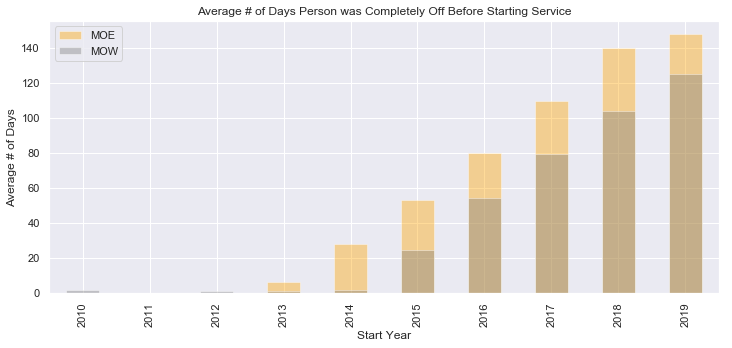

In [171]:

# Average # of Days Person was Off Before Starting Service
# Excluding Services that had another gas service at the same time which causes negative # of Days

plt.figure(figsize=(12,5))
plt1 = df[((df['SA_START_YEAR'] >= '2010')&(df['SA_START_YEAR'] <= '2020')&(df['CIS_DIVISION']=='LGC')&(df['PERSON_DAYS_INACTIVE_BEFORE']>=0))].groupby('SA_START_YEAR')['PERSON_DAYS_INACTIVE_BEFORE'].mean().plot(kind='bar', color='orange', alpha=.4, grid=True, label='MOE')
plt1.set_title('Average # of Days Person was Completely Off Before Starting Service')

plt2 = df[((df['SA_START_YEAR'] >= '2010')&(df['SA_START_YEAR'] <= '2020')&(df['CIS_DIVISION']=='MGE')&(df['PERSON_DAYS_INACTIVE_BEFORE']>=0))].groupby('SA_START_YEAR')['PERSON_DAYS_INACTIVE_BEFORE'].mean().plot(kind='bar', color='gray', alpha=.4, grid=True, label='MOW')

plt1.set_xlabel('Start Year')
plt1.set_ylabel('Average # of Days')

#plt1.set_xticks(np.arange(len(plt1_column_names)))

#plt1.set_xticklabels(plt1_column_names)

#h1, l1 = plt7.get_legend_handles_labels() 

plt.legend(loc=0)

plt.show()

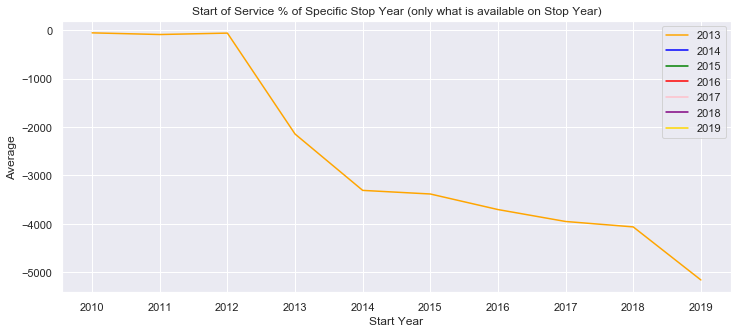

In [172]:
plt1_column_names = ('2010','2011','2012','2013','2014','2015','2016','2017','2018','2019')

plt.figure(figsize=(12,5))
plt1 = df[((df['SA_START_YEAR'] >= '2010')&(df['SA_START_YEAR'] <= '2020')&(df['CIS_DIVISION']=='LGC'))].groupby('SA_START_YEAR')['PERSON_DAYS_INACTIVE_BEFORE'].mean().plot(kind='line', color='orange', grid=True, label='2013')
plt1.set_title('Start of Service % of Specific Stop Year (only what is available on Stop Year)')

#plt2 = df[((df['SA_START_YEAR'] <= '2014')&(df['SA_END_YEAR'] >= '2014')
#   &(df['SA_START_YEAR'] >= '2010')&(df['SA_START_YEAR'] <= '2020'))].groupby('SA_START_YEAR')['PERSON_DAYS_INACTIVE_BEFORE'].mean().plot(kind='line', color='blue', grid=True, label='2014')
#plt3 = df[((df['SA_START_YEAR'] <= '2015')&(df['SA_END_YEAR'] >= '2015')
#   &(df['SA_START_YEAR'] >= '2010')&(df['SA_START_YEAR'] <= '2020'))].groupby('SA_START_YEAR')['STOP_2015'].mean().plot(kind='line', color='green', grid=True, label='2015')
#plt4 = df[((df['SA_START_YEAR'] <= '2016')&(df['SA_END_YEAR'] >= '2016')
#   &(df['SA_START_YEAR'] >= '2010')&(df['SA_START_YEAR'] <= '2020'))].groupby('SA_START_YEAR')['STOP_2016'].mean().plot(kind='line', color='red', grid=True, label='2016')
#plt5 = df[((df['SA_START_YEAR'] <= '2017')&(df['SA_END_YEAR'] >= '2017')
#   &(df['SA_START_YEAR'] >= '2010')&(df['SA_START_YEAR'] <= '2020'))].groupby('SA_START_YEAR')['STOP_2017'].mean().plot(kind='line', color='pink', grid=True, label='2017')
#plt6 = df[((df['SA_START_YEAR'] <= '2018')&(df['SA_END_YEAR'] >= '2018')
#   &(df['SA_START_YEAR'] >= '2010')&(df['SA_START_YEAR'] <= '2020'))].groupby('SA_START_YEAR')['STOP_2018'].mean().plot(kind='line', color='purple', grid=True, label='2018')
#plt7 = df[((df['SA_START_YEAR'] <= '2019')&(df['SA_END_YEAR'] >= '2019')
#   &(df['SA_START_YEAR'] >= '2010')&(df['SA_START_YEAR'] <= '2020'))].groupby('SA_START_YEAR')['STOP_2019'].mean().plot(kind='line', color='gold', grid=True, label='2019')

plt1.set_xlabel('Start Year')
plt1.set_ylabel('Average')

plt1.set_xticks(np.arange(len(plt1_column_names)))

plt1.set_xticklabels(plt1_column_names)

h1, l1 = plt7.get_legend_handles_labels() 

plt.legend(h1, l1, loc=1)

plt.show()